In [1]:
import numpy as np
import glob
from   PIL import Image, ImageOps
import matplotlib.pyplot as plt

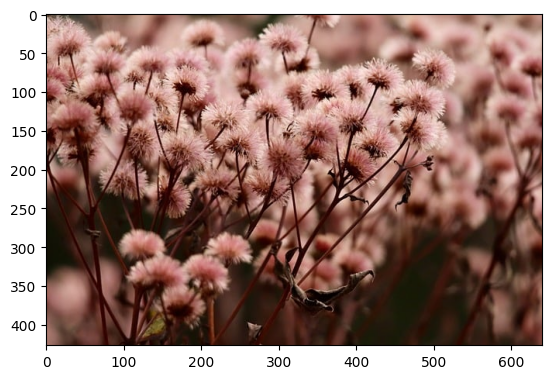

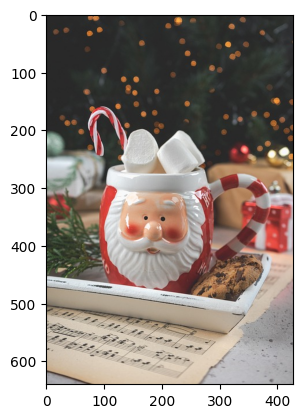

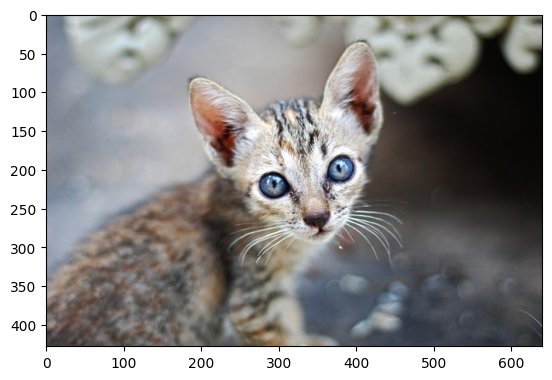

In [2]:
images = []

for filename in glob.glob('demo images/*.jpg'): #assuming gif
    im = Image.open(filename)
    im = np.array(im).astype(np.float32) / 255
    images.append(im)

    plt.imshow(im)
    plt.show()

In [ ]:
def get_noisy_images(image, display_process = False):
    """Image should be of the format
    (height, width, channels), and be 
    filled with floats between 0 and 1.
    
    Returns a list of static images
    
    display_process tells whether or not
    to plot the static images as they are created"""
    
    # some pixels (I.e. dark ones) cannot have a sample
    # in the averaging process that is less than 0,
    # so this is not the number we will be adding + subtracting
    # from the image's pixels, it is the percentage
    # of the maximum value we can safely add + subtract
    # from each pixels' values.
    random_differences = np.random.uniform(0, 1, image.shape)
    # here we convert it to absolute values
    full_white = np.ones(image.shape)
    full_dark  = np.zeros(image.shape)
    maximum_changes = np.minimum(np.abs(image - full_dark), np.abs(image - full_white))
    random_differences *= maximum_changes

    static_image_A = image + random_differences
    static_image_B = image - random_differences

    if display_process:
        plt.imshow(static_image_A)
        plt.show()
        plt.imshow(static_image_B)
        plt.show()

    # now jumble pixels between the two, to shuffle it better

    swap_map = (np.random.random(image.shape) > .5) * 1

    static_image_A, static_image_B = (static_image_A * swap_map) + (static_image_B * (1 - swap_map)), (static_image_B * swap_map) + (static_image_A * (1 - swap_map))

    if display_process:
        plt.imshow(static_image_A)
        plt.show()
        plt.imshow(static_image_B)
        plt.show()

    return static_image_A, static_image_B

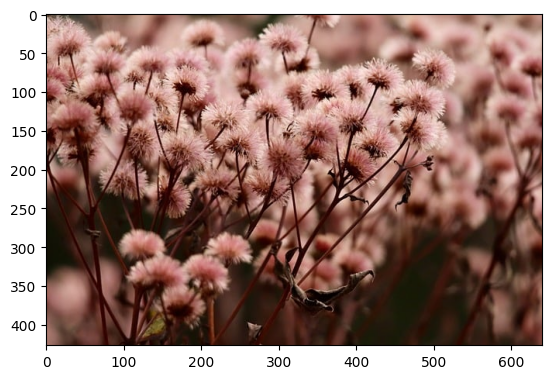

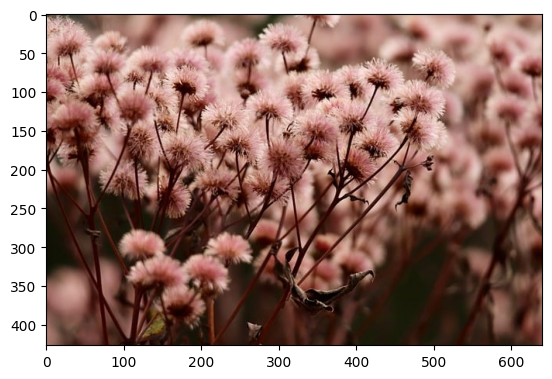

Difference between original and reconstructed image: 0.0


In [4]:
original_image = images[0]
A, B = get_noisy_images(original_image)
reconstructed_image = (A+B) / 2

plt.imshow(original_image)
plt.show()
plt.imshow(reconstructed_image)
plt.show()

print("Difference between original and reconstructed image:", np.sum(original_image - reconstructed_image))


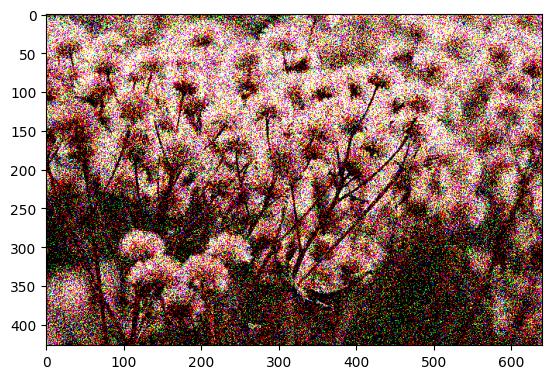

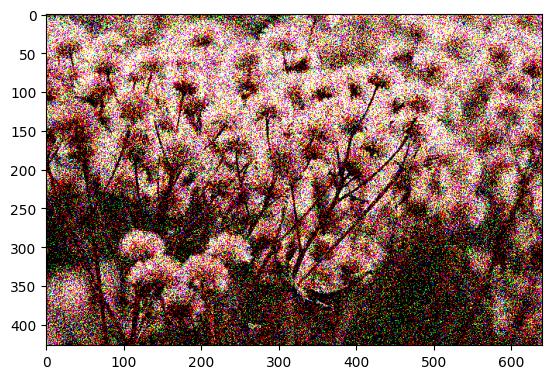

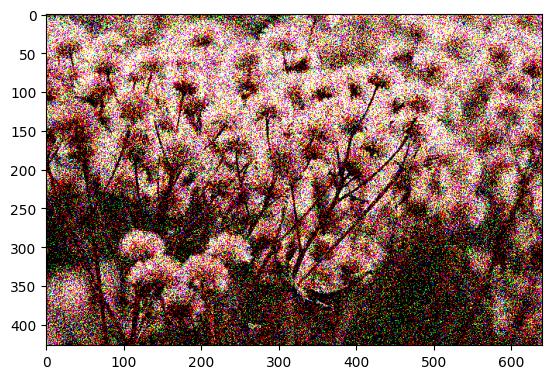

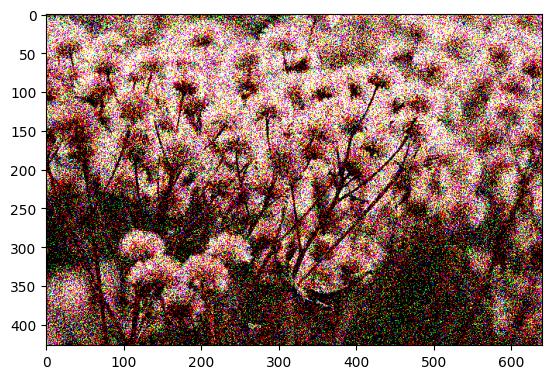

(array([[[1., 1., 0.],
         [1., 1., 0.],
         [0., 0., 0.],
         ...,
         [0., 1., 0.],
         [1., 1., 0.],
         [1., 1., 1.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 1., 0.],
         ...,
         [0., 0., 1.],
         [1., 1., 0.],
         [1., 0., 1.]],
 
        [[1., 0., 1.],
         [0., 1., 0.],
         [0., 0., 0.],
         ...,
         [1., 1., 0.],
         [1., 1., 0.],
         [1., 0., 1.]],
 
        ...,
 
        [[1., 1., 0.],
         [0., 1., 0.],
         [1., 1., 0.],
         ...,
         [1., 0., 0.],
         [0., 0., 0.],
         [0., 0., 1.]],
 
        [[1., 1., 1.],
         [0., 1., 0.],
         [0., 1., 1.],
         ...,
         [0., 0., 0.],
         [1., 0., 0.],
         [1., 1., 0.]],
 
        [[1., 0., 1.],
         [1., 1., 0.],
         [0., 1., 0.],
         ...,
         [1., 1., 0.],
         [0., 0., 0.],
         [1., 0., 0.]]]),
 array([[[1., 1., 0.],
         [1., 1., 0.],
         

In [5]:
loop_image = np.array(original_image)
for i in range(50):
    loop_image, _ = get_noisy_images(loop_image)

get_noisy_images(loop_image, True)